## Desicions Trees

Outliere necemo izbacivati, jer upravo nam oni mogu sadrzati znacajne informacije o tome da li ce doci do bankrotstva kompanije. Zato cemo ih postaviti na granicne vrednosti, sada imamo nesto bolji uvid u samu rasporelu podataka.

In [35]:
# Ucitavanje pretprocesiranih podataka
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, Y_train, Y_test = joblib.load('../../preprocessing/classification_data.joblib')

In [39]:
for column in X_train.columns:
    (Q1, Q3) = X_train[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)
    X_train[column] = np.clip(X_train[column], lower_limit, upper_limit)
    X_test[column] = np.clip(X_test[column], lower_limit, upper_limit)

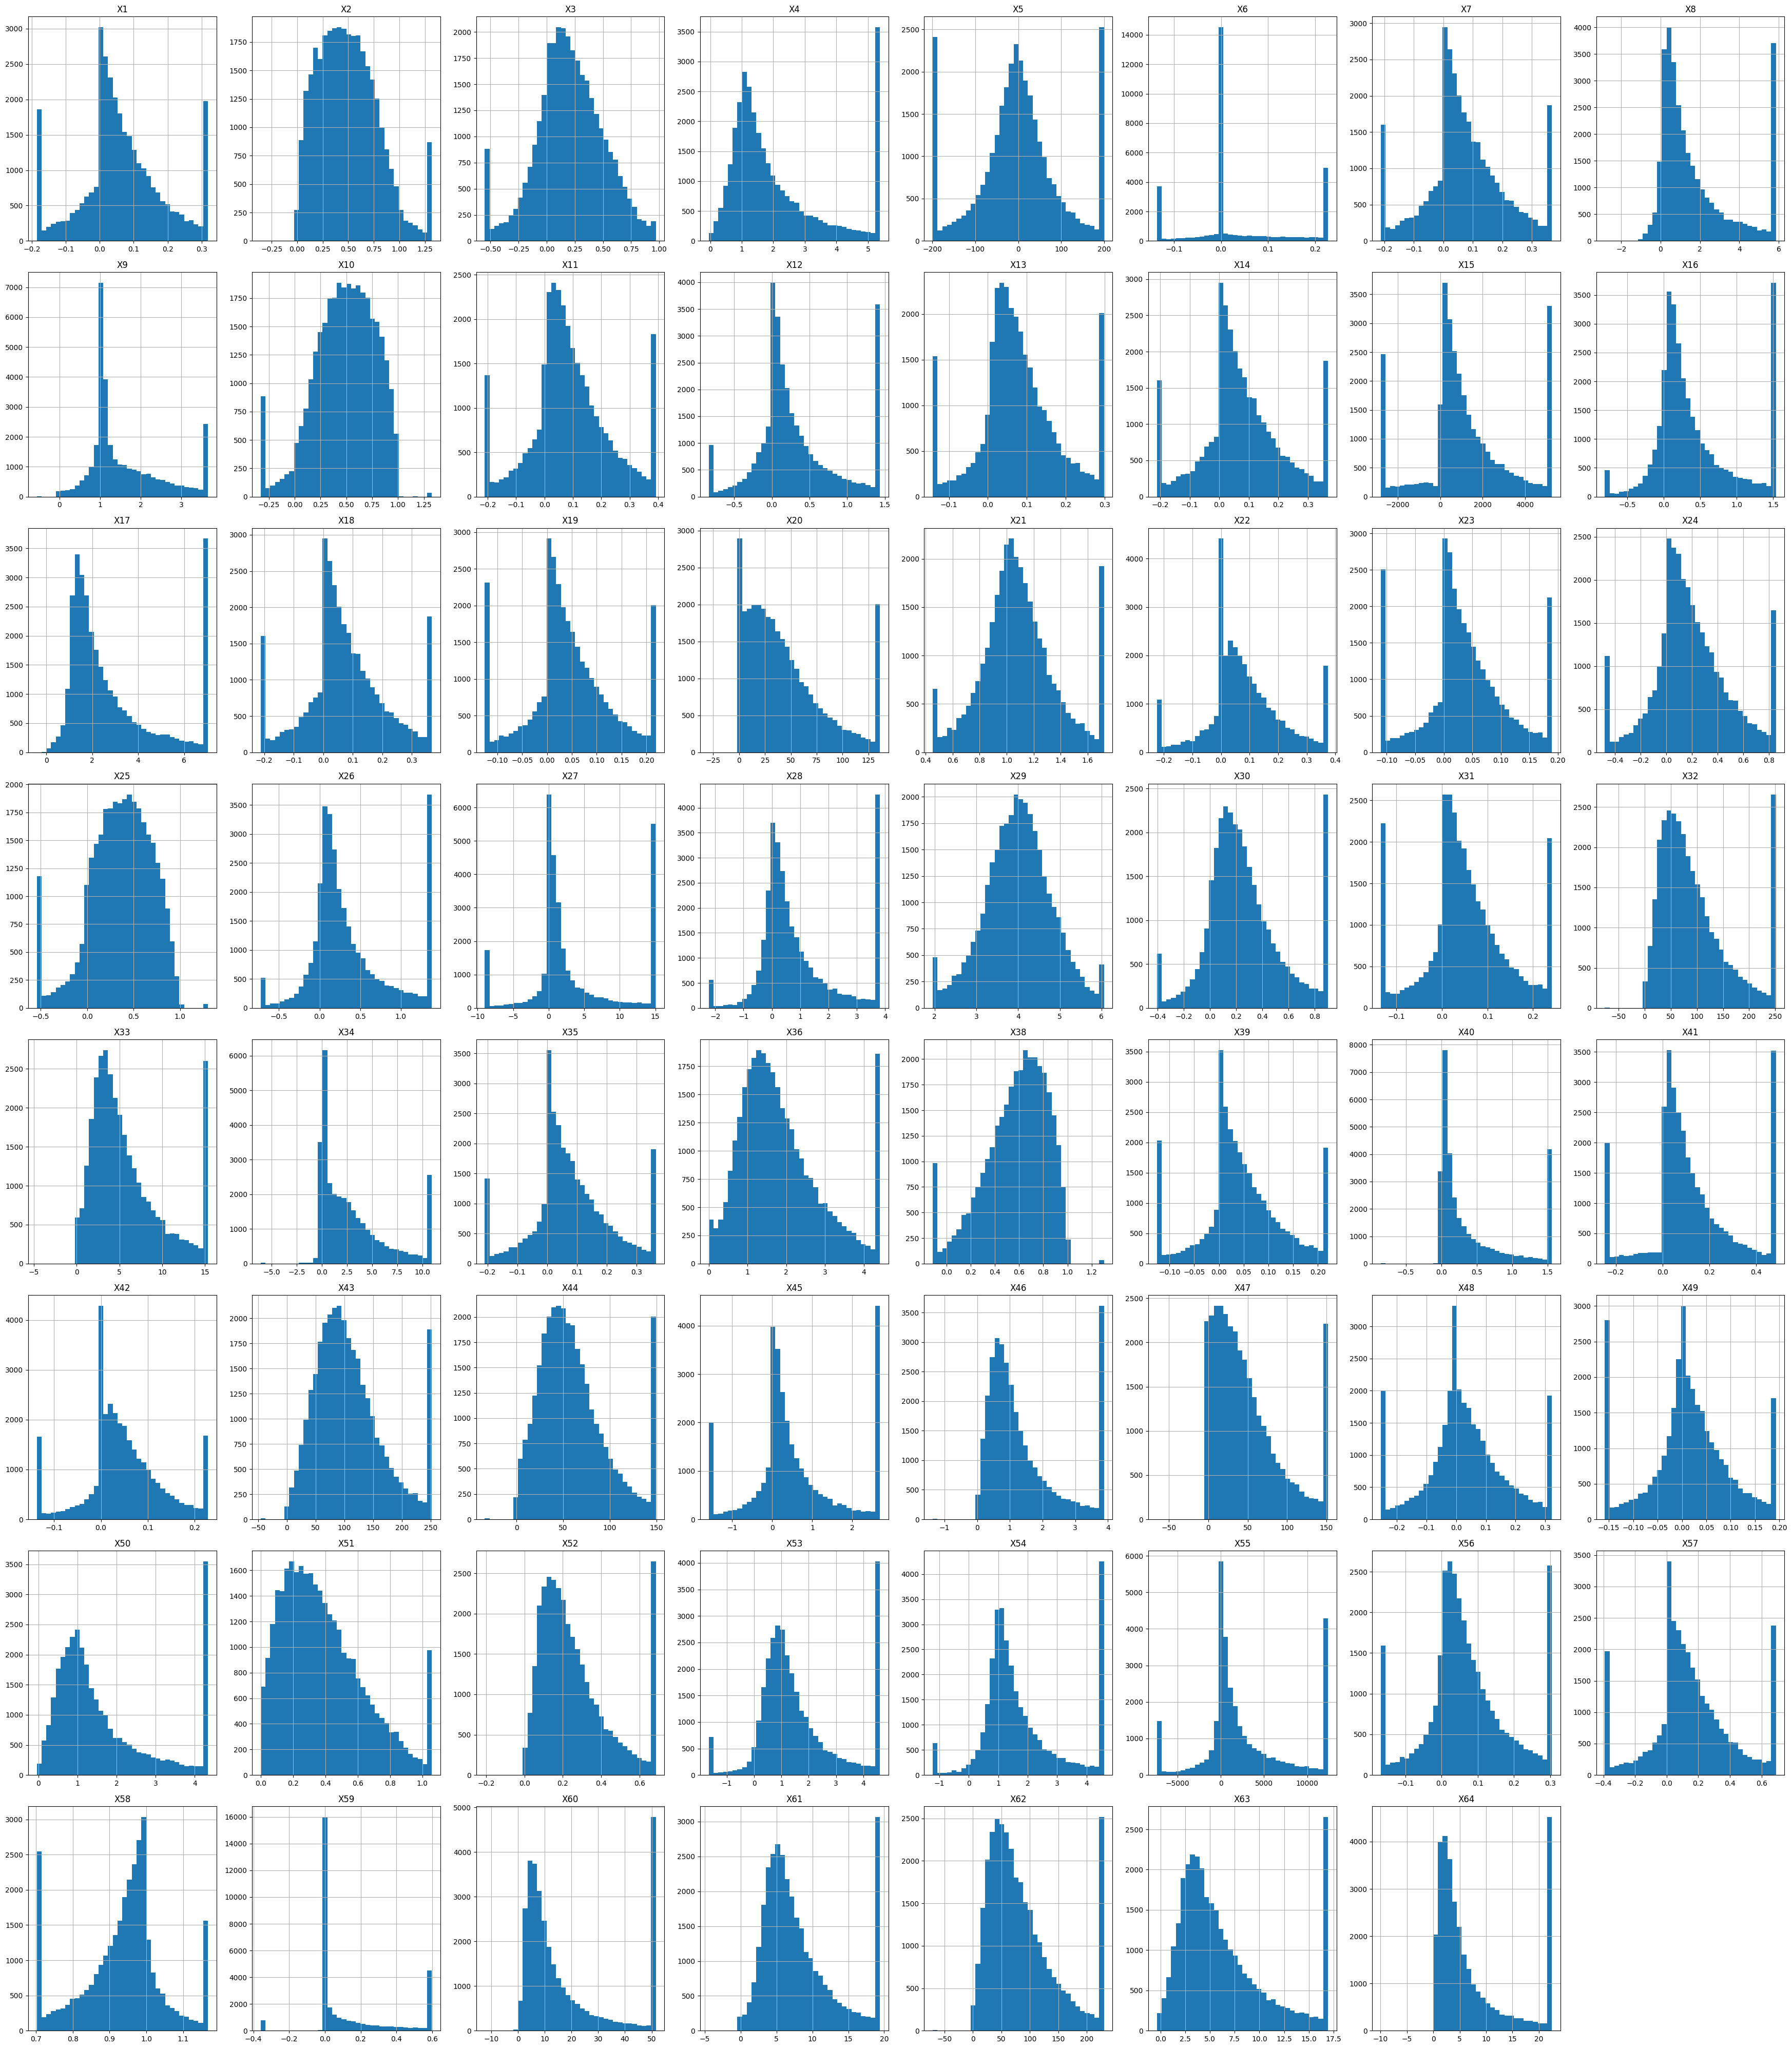

In [40]:
X_train.hist(bins=36, figsize=(35, 40))
plt.tight_layout()
plt.show()

Stubovi na granicama predstavljaju outlie-re koje smo postavili na granicne vrednosti, i odavde se moze primetiti njihov znacajan udeo.

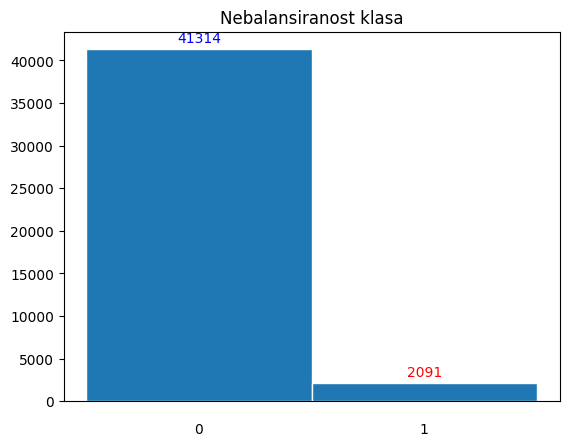

In [41]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins) * 0.5 + bins[:-1]  # računanje centra korpice

for i, (fr, x) in enumerate(zip(freq, bin_centers)):
    height = int(fr)
    color = 'red' if i == 1 else 'blue'  # Crvena boja za drugi stub, inače plava
    plt.annotate("{}".format(height),
                 xy=(x, height),             # poziciranje broja iznad korpice
                 xytext=(0, 3),              # pomeranje teksta ispod stuba
                 textcoords="offset points",
                 ha='center', va='bottom',
                 color=color
                 )
    
plt.annotate("0",       # Dodajte anotaciju ispod prvog stuba sa vrednošću 0
             xy=(bin_centers[0], 0),   # Pozicija anotacije ispod prvog stuba
             xytext=(0, -15),           # Pomeranje teksta ispod stuba
             textcoords="offset points",
             ha='center', va='top', fontsize=10, color='black'
             )

plt.annotate("1",       # Dodajte anotaciju ispod drugog stuba sa vrednošću 1
             xy=(bin_centers[1], 0),   # Pozicija anotacije ispod drugog stuba
             xytext=(0, -15),           # Pomeranje teksta ispod stuba
             textcoords="offset points",
             ha='center', va='top', fontsize=10, color='black'
             )

plt.title('Nebalansiranost klasa')
plt.xticks([])  # Uklonite oznake na x osi
plt.show()

Moramo izvrsiti balansiranje klasa. Pre toga cemo izvrsiti standardizaciju a zatim primeniti SMOTE algoritam.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(colored("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()), "green"))
    print(colored("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()), "blue"))
    return X_resampled, y_resampled

In [45]:
from imblearn.over_sampling import SMOTE
from termcolor import colored
from collections import Counter

smote = SMOTE(k_neighbors=10, random_state=42)
X_resampled, y_resampled = resample(smote, X_train, Y_train)

Number of instances before resampling with SMOTE : dict_items([(0.0, 30985), (1.0, 1568)]). 
Number of instances after  resampling with SMOTE : dict_items([(0.0, 30985), (1.0, 30985)]). 
